In [164]:
!pip install --upgrade pip
!pip install pandas scikit-learn matplotlib

In [165]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.dummy import DummyClassifier

In [166]:
y_true = np.load(os.path.join('Arrays', 'DonutClassification', f'10epochs_y_real.npy'))
X = np.zeros((len(y_true), 1))
results = []
classes = np.unique(y_true)
classes

array(['credit_note', 'debit_note', 'order', 'proforma', 'purchase_order',
       'receipt', 'sales_order', 'tax_invoice', 'utility_bill'],
      dtype='<U14')

In [167]:
def evaluate(classifier, y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    balanced_accuracy = metrics.balanced_accuracy_score(y_true, y_pred)
    print(f'{classifier} accuracy: {accuracy:.4f}')
    print(f'{classifier} balanced accuracy: {balanced_accuracy:.4f}')
    result = {
        'classifier': classifier,
        'accuracy': accuracy,
        'balanced_accuracy': balanced_accuracy
    }
    results.append(result)

## Class Distribution

In [168]:
counts = pd.Series(y_true).value_counts(ascending=True)
counts

debit_note           2
utility_bill         4
proforma             6
credit_note          7
receipt            224
sales_order        424
purchase_order     634
order             1121
tax_invoice       1457
Name: count, dtype: int64

In [169]:
classes_ger = ['Lastschrift', 'Strom- und\nGasrechnung', 'Proforma', 'Gutschrift', 'Beleg', 'Kundenauftrag', 'Auftragsbestätigung', 'Auftrag', 'Steuerrechnung']
counts.index = classes_ger
counts

Lastschrift                   2
Strom- und\nGasrechnung       4
Proforma                      6
Gutschrift                    7
Beleg                       224
Kundenauftrag               424
Auftragsbestätigung         634
Auftrag                    1121
Steuerrechnung             1457
Name: count, dtype: int64

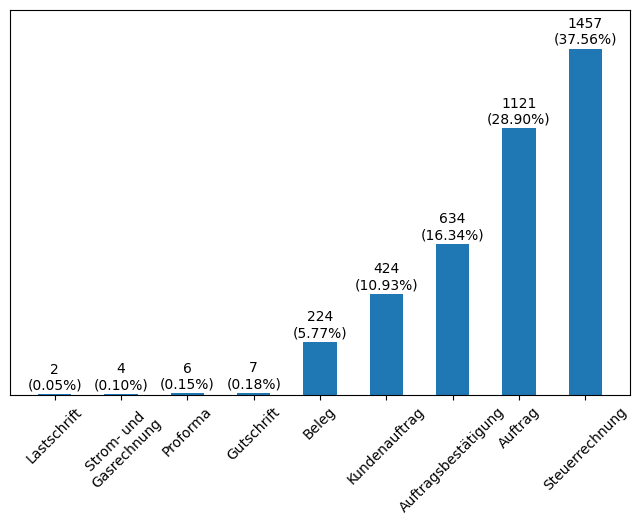

In [170]:
plt.figure(figsize=(8, 5))
plt.bar(x=counts.index, height=counts.values, width=0.5)

# Rotating x labels by 45 degrees
plt.xticks(rotation=45)

# Displaying percentages above each bar
for i, count in enumerate(counts.values):
    perc = count / len(y_true) * 100
    plt.text(i, count + 20, f'{count}\n({perc:.2f}%)', ha='center', fontsize=10)
    
plt.ylim(0, 1620)
plt.yticks([])

plt.show()

## Baseline

### Dummy Classifier

In [171]:
strategies = ['most_frequent', 'stratified']

for strategy in strategies:
    classifier = DummyClassifier(strategy=strategy, random_state=0)
    classifier.fit(X=None, y=y_true)
    y_pred = classifier.predict(y_true)
    evaluate(strategy, y_true, y_pred)

most_frequent accuracy: 0.3756
most_frequent balanced accuracy: 0.1111
stratified accuracy: 0.2573
stratified balanced accuracy: 0.1035


### Zero Rate and Random Rate

In [172]:
def zero_rate(class_frequencies):
    return max(class_frequencies)

def random_rate(class_frequencies):
    return sum([class_frequency ** 2 for class_frequency in class_frequencies])

In [173]:
class_frequencies = pd.Series(y_true).value_counts(normalize=True).values
print(f'zero rate: {zero_rate(class_frequencies):.4f}')
print(f'random rate: {random_rate(class_frequencies):.4f}')

zero rate: 0.3756
random rate: 0.2666


## Donut Classification

In [174]:
# Load the predictions of the best donut model
donut_y_pred = np.load(os.path.join('Arrays', 'DonutClassification', f'10epochs_y_pred.npy')).tolist()
evaluate('Donut', y_true, donut_y_pred)

Donut accuracy: 0.9969
Donut balanced accuracy: 0.7918


In [175]:
pd.DataFrame(results)

,classifier,accuracy,balanced_accuracy
0,most_frequent,0.375612,0.111111
1,stratified,0.257283,0.103505
2,Donut,0.996906,0.791832


## VGG16 Classification

In [176]:
# Load the predictions of the best VGG16 model
vgg16_y_test = np.load(os.path.join('Arrays', 'VGG16', f'y_test.npy'))
vgg16_y_true = [classes[np.argmax(sample)] for sample in vgg16_y_test]
vgg16_y_pred = np.load(os.path.join('Arrays', 'VGG16', f'predictions_all_layer_50epochs_10_5.npy'))
evaluate('VGG16', vgg16_y_true, vgg16_y_pred)

VGG16 accuracy: 0.9923
VGG16 balanced accuracy: 0.9376


In [177]:
pd.DataFrame(results)

,classifier,accuracy,balanced_accuracy
0,most_frequent,0.375612,0.111111
1,stratified,0.257283,0.103505
2,Donut,0.996906,0.791832
3,VGG16,0.992260,0.937553


## InceptionV3 Classification